# 4.b Plot type - contour

PyNGL provides plot functions to create line and contour plots. This notebook starts with a simple line contour plot and ends with a filled contour plot and its labelbar.

The next lines should be known, now, but this time we use the 2D data file tsurf.nc.


In [1]:
from IPython.display import Image
import xarray as xr
import numpy as np
import Ngl

ds = xr.open_dataset('./data/tsurf.nc')

tsurf = ds.tsurf[0,::-1,:]         #-- first time step, reverse latitude
lat   = ds.lat[::-1]               #-- reverse latitudes
lon   = ds.lon[:]                  #-- all longitudes

wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()

res.sfXArray  =  ds.lon.values
res.sfYArray  =  ds.lat.values

For contour plots there are a lot of resources available to define the settings. But we begin with the default settings of PyNGL to create our first contour line plot. The data to be plotted is the first time step.

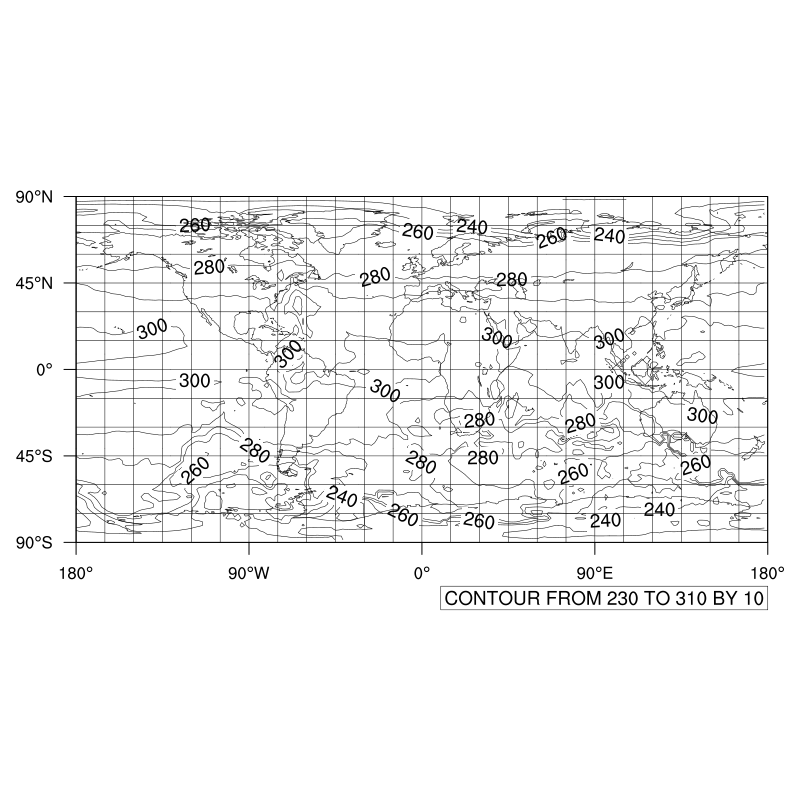

In [2]:
plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

Change the contour plot increment to 5 and add a title to the plot.

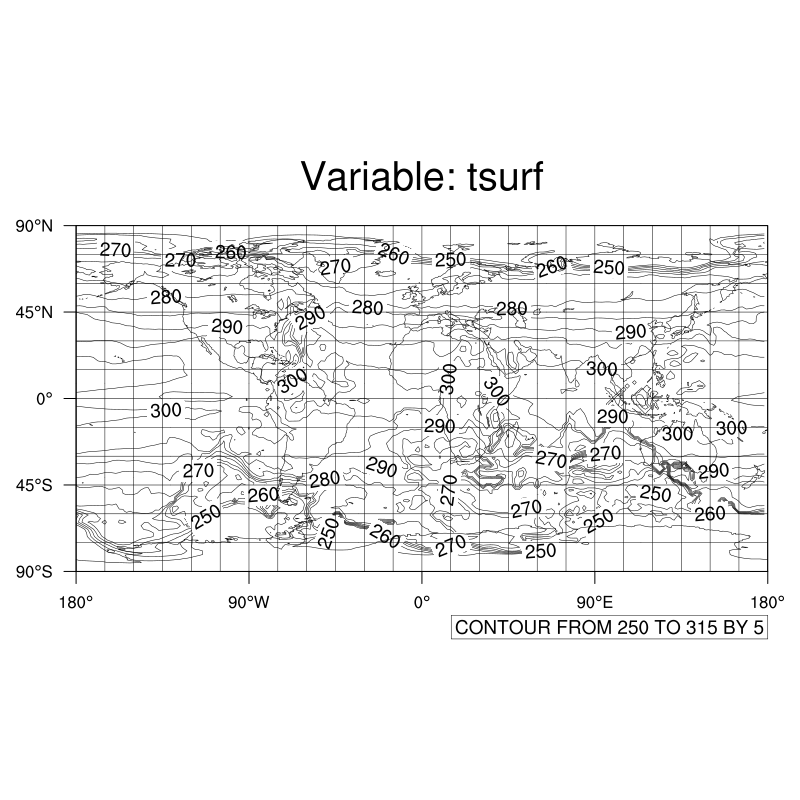

In [3]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnLevelSelectionMode = "ManualLevels" #-- define levels
res.cnMinLevelValF  = 250.                #-- minimum contour value
res.cnMaxLevelValF  = 315.                #-- maximum contour value
res.cnLevelSpacingF =   5.                #-- contour increment

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

There are now too many lines, the map outline and the contour lines. We can fill the land with a gray color and without the map outlines.


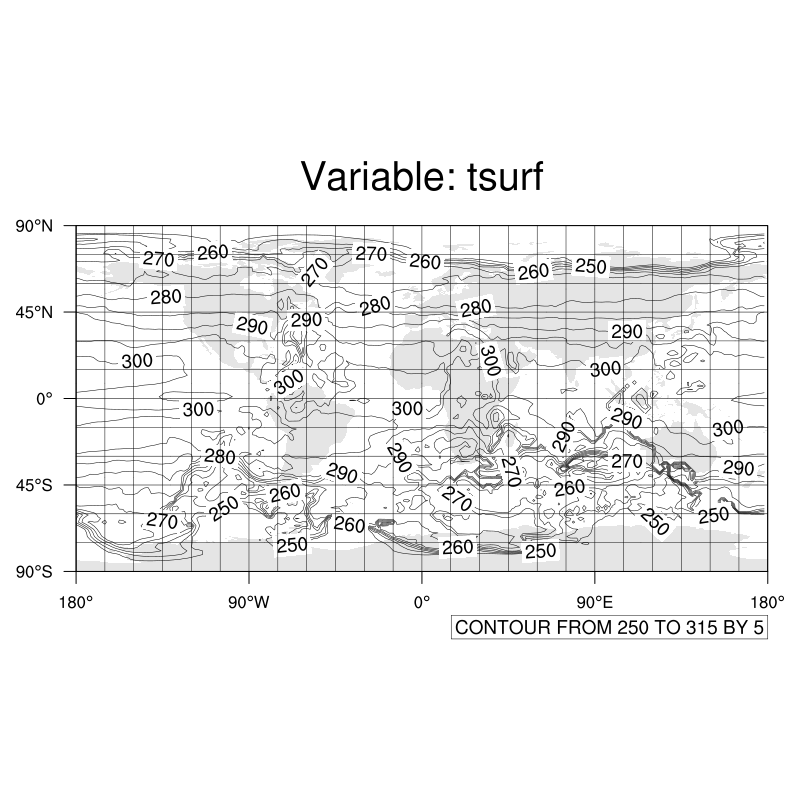

In [4]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 250.           #-- minimum contour value
res.cnMaxLevelValF         = 315.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.mpOutlineOn            =  False         #-- turn on map outlines
res.mpFillOn               =  True          #-- turn map fill on
res.mpOceanFillColor       = "Transparent"  #-- set ocean fill color to transparent
res.mpLandFillColor        = "Gray90"       #-- set land fill color to gray
res.mpInlandWaterFillColor = "Gray90"       #-- set inland water fill color to gray

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

That's better.

To zoom into the global map to have a better view at the data, we have to use other resources of the **mp** resource group.


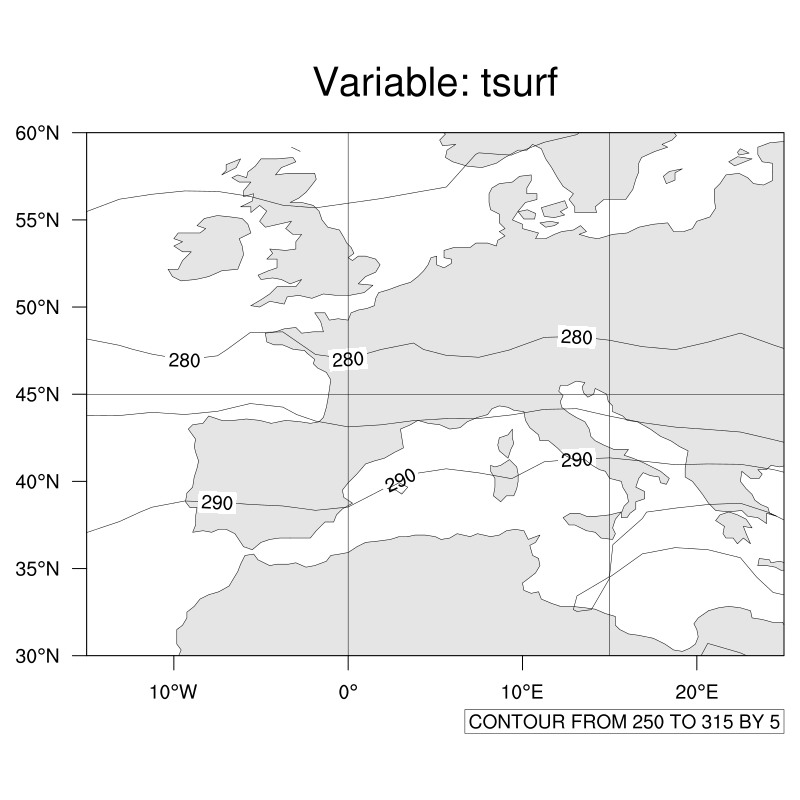

In [5]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 250.           #-- minimum contour value
res.cnMaxLevelValF         = 315.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.mpFillOn               =  True          #-- turn map fill on
res.mpOceanFillColor       = "Transparent"  #-- set ocean fill color to transparent
res.mpLandFillColor        = "Gray90"       #-- set land fill color to gray
res.mpInlandWaterFillColor = "Gray90"       #-- set inland water fill color to gray

res.mpLimitMode            = "LatLon"       #-- limit map via lat/lon
res.mpMinLatF              =  30.           #-- select region to be plotted
res.mpMaxLatF              =  60.
res.mpMinLonF              = -15.
res.mpMaxLonF              =  25.

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

The map resolution is set to LowRes by default, this is good enough for a global map. We change the map resolution to MediumRes from the map data base Earth..4 and decrease the contour increment again.


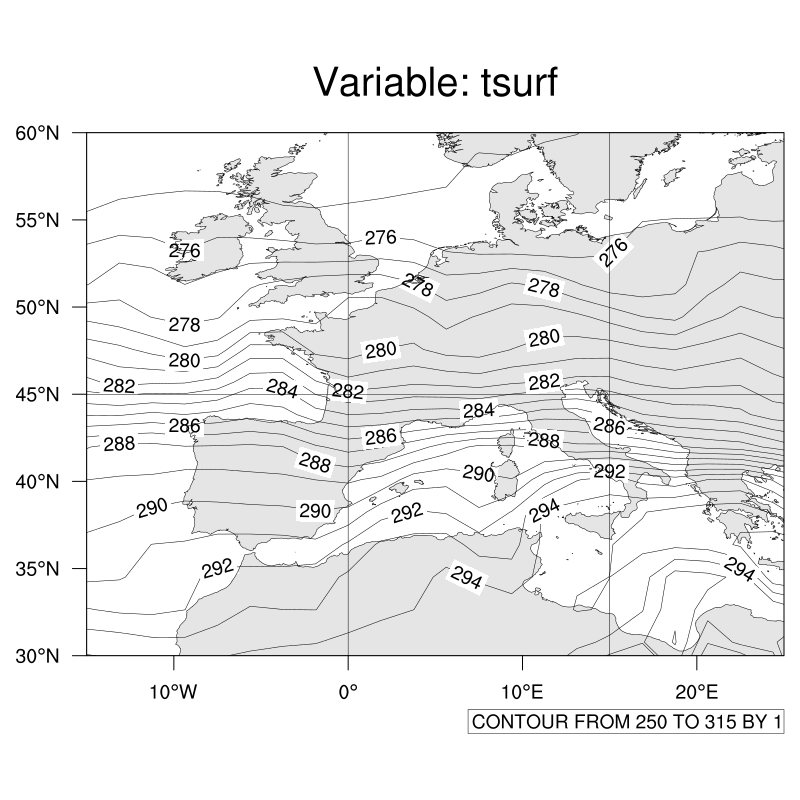

In [6]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 250.           #-- minimum contour value
res.cnMaxLevelValF         = 315.           #-- maximum contour value
res.cnLevelSpacingF        =   1.           #-- contour increment

res.mpDataSetName          = "Earth..4"     #-- set map data base version
res.mpDataBaseVersion      = "MediumRes"    #-- MediumRes = Ncarg4_1

res.mpFillOn               =  True          #-- turn map fill on
res.mpOceanFillColor       = "Transparent"  #-- set ocean fill color to transparent
res.mpLandFillColor        = "Gray90"       #-- set land fill color to gray
res.mpInlandWaterFillColor = "Gray90"       #-- set inland water fill color to gray

res.mpLimitMode            = "LatLon"       #-- limit map via lat/lon
res.mpMinLatF              =  30.           #-- select region to be plotted
res.mpMaxLatF              =  60.
res.mpMinLonF              = -15.
res.mpMaxLonF              =  25.

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

The contour lines are very edgy because we zoomed into the map and therefore we want to draw them a little smoother.


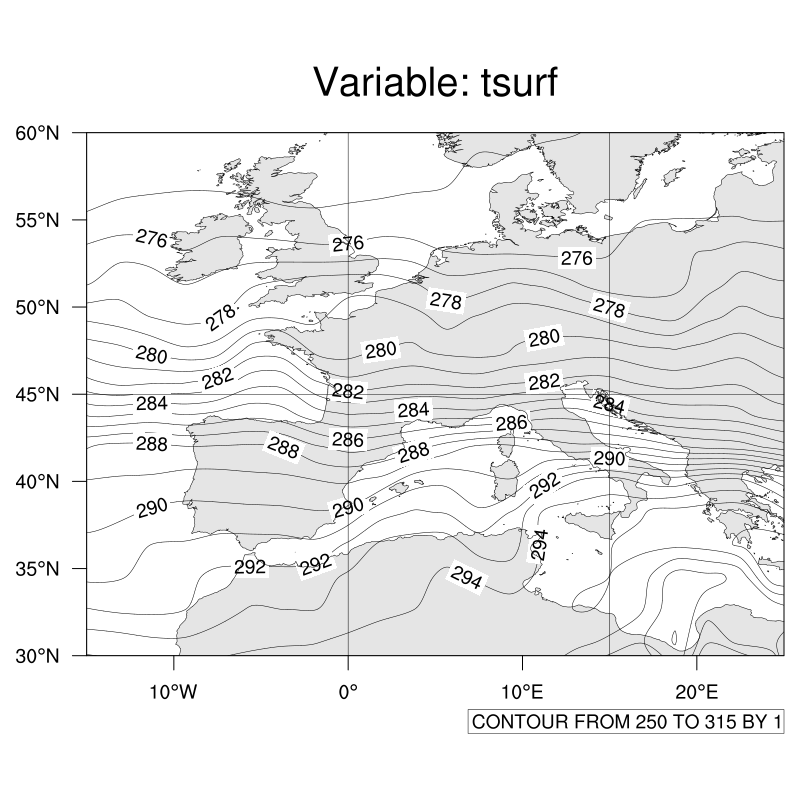

In [7]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 250.           #-- minimum contour value
res.cnMaxLevelValF         = 315.           #-- maximum contour value
res.cnLevelSpacingF        =   1.           #-- contour increment

res.cnSmoothingOn          =  True          #-- smooth contouring
res.cnSmoothingDistanceF   =  0.0001        #-- fraction of the width of the window

res.mpDataSetName          = "Earth..4"     #-- set map data base version
res.mpDataBaseVersion      = "MediumRes"    #-- MediumRes = Ncarg4_1

res.mpFillOn               =  True          #-- turn map fill on
res.mpOceanFillColor       = "Transparent"  #-- set ocean fill color to transparent
res.mpLandFillColor        = "Gray90"       #-- set land fill color to gray
res.mpInlandWaterFillColor = "Gray90"       #-- set inland water fill color to gray

res.mpLimitMode            = "LatLon"       #-- limit map via lat/lon
res.mpMinLatF              =  30.           #-- select region to be plotted
res.mpMaxLatF              =  60.
res.mpMinLonF              = -15.
res.mpMaxLonF              =  25.

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

In the next steps we will create a color filled contour plot and learn how to change the color map and the labelbar.

Most of our settings from the examples above will stay but we will learn new resources.


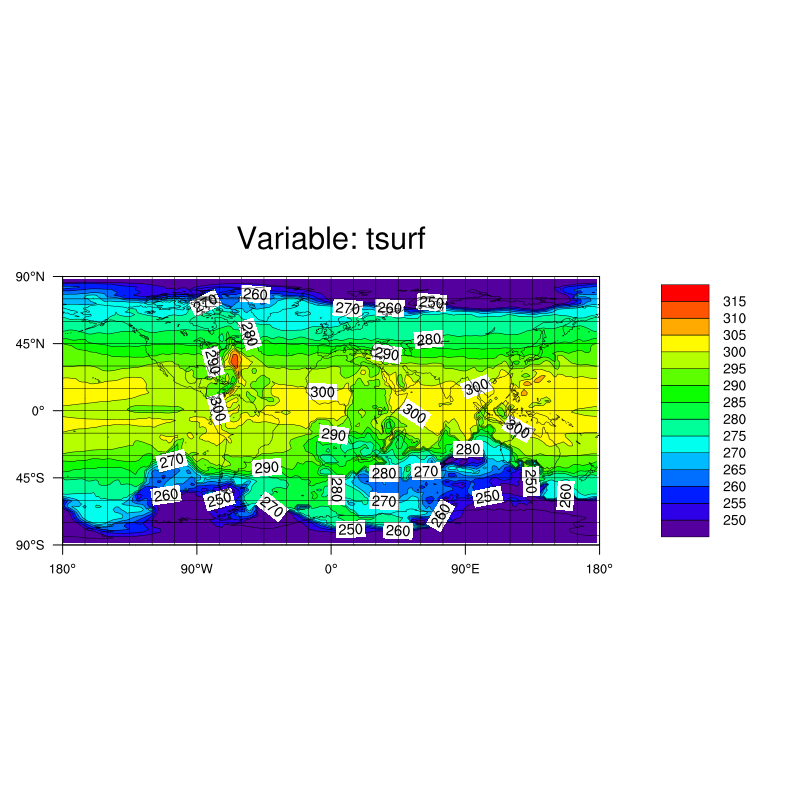

In [8]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 250.           #-- minimum contour value
res.cnMaxLevelValF         = 315.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

#res.cnSmoothingOn          =  True          #-- smooth contouring
#res.cnSmoothingDistanceF   =  0.0001        #-- fraction of the width of the window

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

That's nice and colorful, but the different contour data are not easy to distinguish. Maybe, another color map would be better. See http://ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml.

Also, the contour line labels in the plot are not needed anymore.

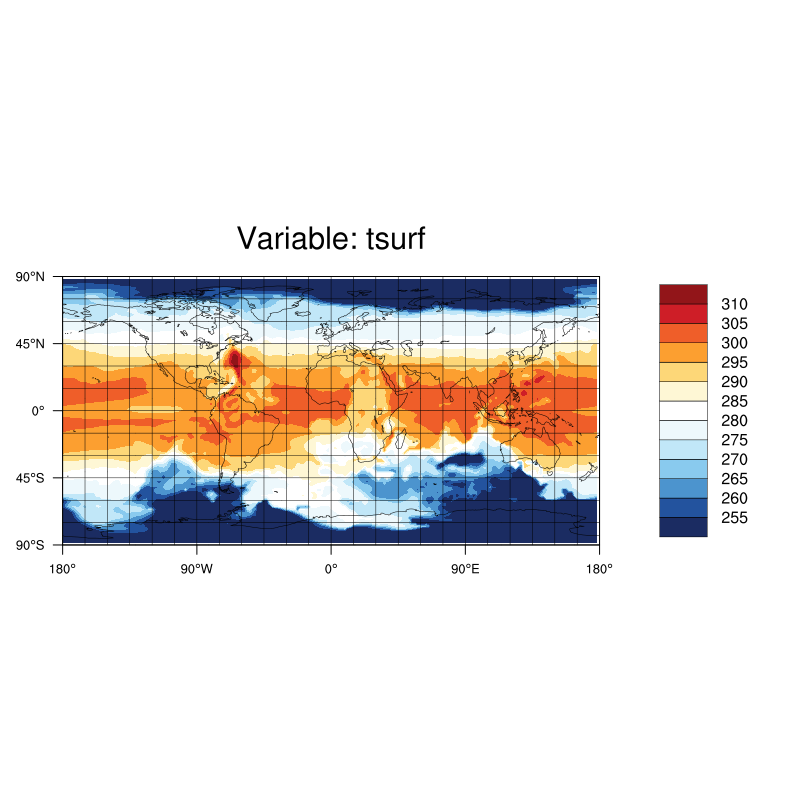

In [9]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'

res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

The values below zero are to be drawn with blue colors and the values above zero in red colors. To do that we can use the indices of the colors directly.


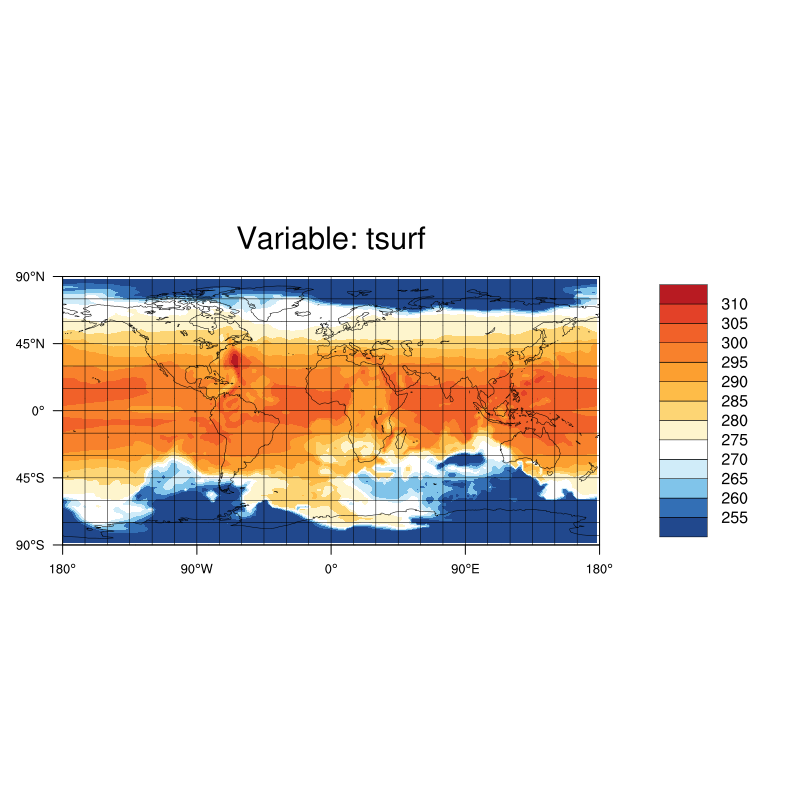

In [10]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'
res.cnFillColors           = [15, 30, 60, 90, 115, 150, 170, 180, 190, 200, 210, 220, 240]
res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

Now, let us manage the labelbar. Decrease the width of the labelbar boxes and reduce the space between the plot and the labelbar. To minimize the space between the plot and the labelbar use the resource **pmLabelBarOrthogonalPosF**, and to chnage the width of the vertical labelbar use **lbBoxMinorExtentF**. 

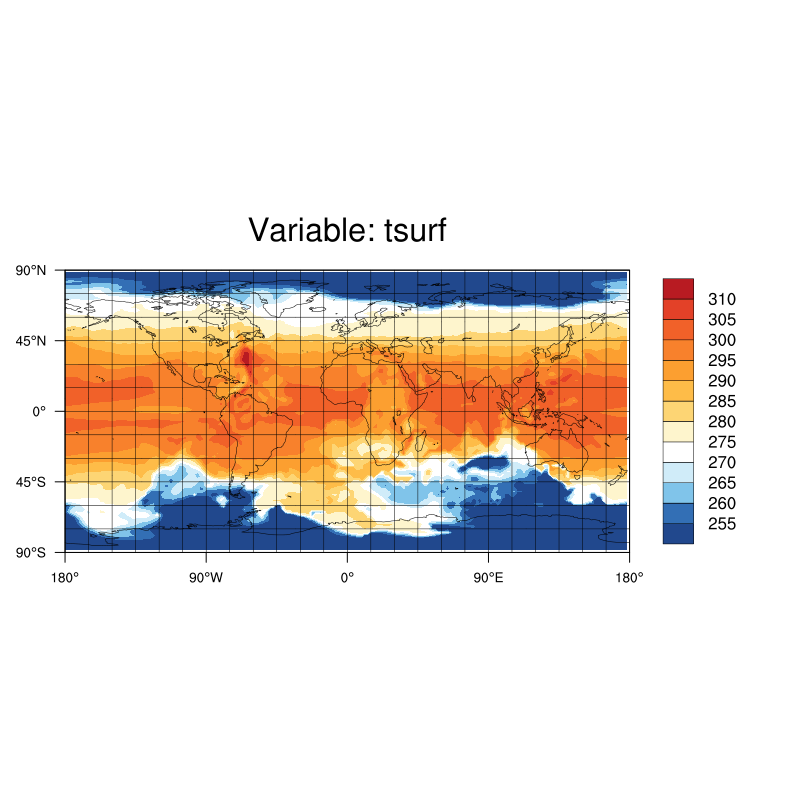

In [11]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'
res.cnFillColors           = [15, 30, 60, 90, 115, 150, 170, 180, 190, 200, 210, 220, 240]
res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.lbBoxMinorExtentF      =  0.2           #-- decrease height of labelbar boxes
res.pmLabelBarOrthogonalPosF = -0.05        #-- move labelbar to the left

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 


The width of the plot is a bit too large, so it would be a good idea to draw the labelbar below the plot.


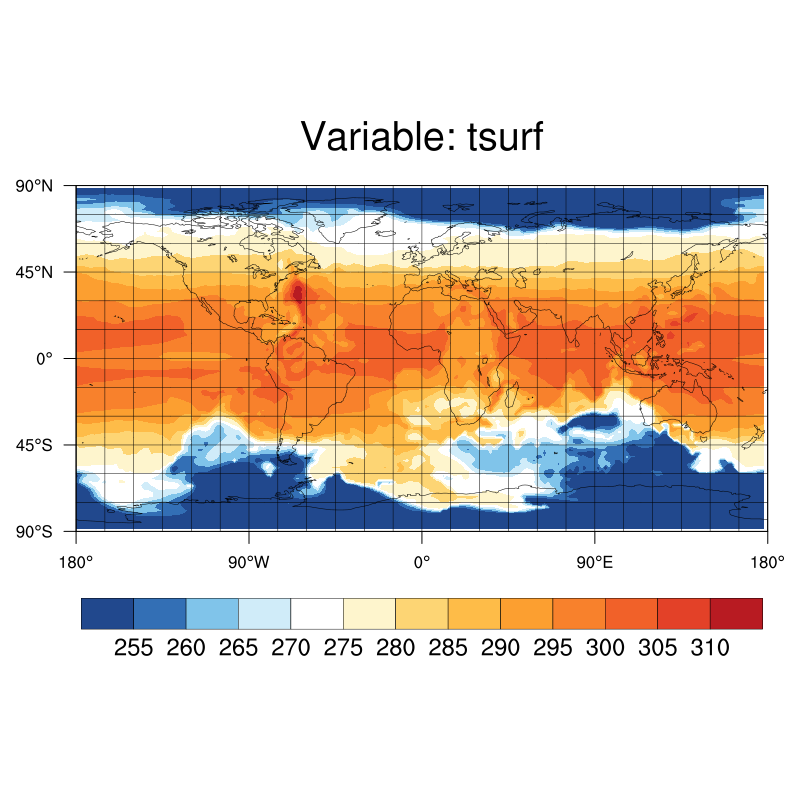

In [12]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'
res.cnFillColors           = [15, 30, 60, 90, 115, 150, 170, 180, 190, 200, 210, 220, 240]
res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.lbOrientation          = 'horizontal'

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

The resource **lbBoxMinorExtentF** can now be used to decrease the hight of the labelbar boxes. Notice, that it doesn't change the width this time because the orientation of the labelbar was changed from vertical to horizontal.


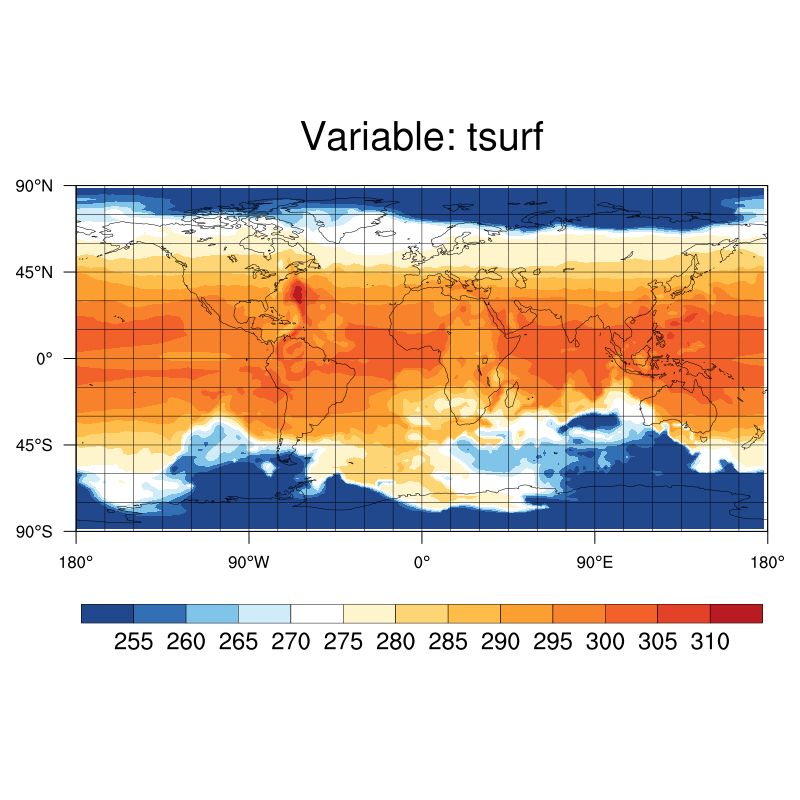

In [13]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'
res.cnFillColors           = [15, 30, 60, 90, 115, 150, 170, 180, 190, 200, 210, 220, 240]
res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.lbBoxMinorExtentF      =  0.2           #-- decrease height of labelbar boxes
res.lbOrientation          = 'horizontal'

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 

To decrease the width of the labelbar use the resource **pmLabelBarWidthF**. Move the labelbar upward with the resource **pmLabelBarOrthogonalPosF**, and move the labelbar labels closer to the labelbar color boxes witrh **lbLabelOffsetF**. Notice, that if you change the labelbar width the height will change too.


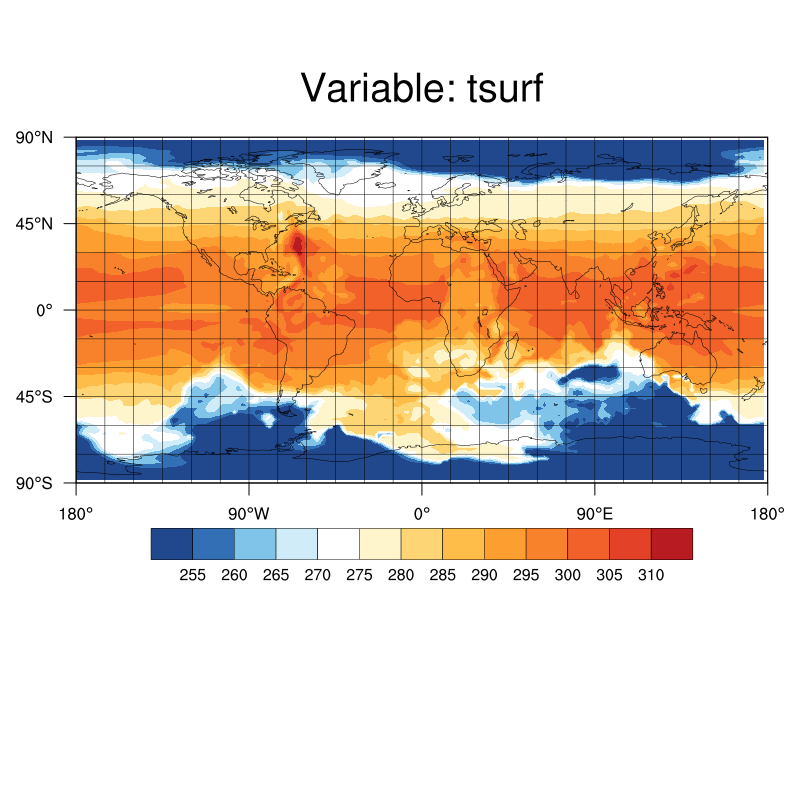

In [14]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_contour_tsurf.png')

res = Ngl.Resources()
res.tiMainString = 'Variable: ' + tsurf.name

res.cnFillOn               =  True         #-- turn on color fill
res.cnFillPalette          = 'BlueWhiteOrangeRed'
res.cnFillColors           = [15, 30, 60, 90, 115, 150, 170, 180, 190, 200, 210, 220, 240]
res.cnLinesOn              =  False
res.cnLineLabelsOn         =  False

res.cnLevelSelectionMode   = "ManualLevels" #-- define levels
res.cnMinLevelValF         = 255.           #-- minimum contour value
res.cnMaxLevelValF         = 310.           #-- maximum contour value
res.cnLevelSpacingF        =   5.           #-- contour increment

res.lbLabelOffsetF         =  0.03          #-- move labelbar labels upward
res.pmLabelBarOrthogonalPosF = -0.4        #-- move labelbar upward
res.pmLabelBarWidthF       =  0.5           #-- width of the labelbar

res.lbBoxMinorExtentF      =  0.1           #-- decrease height of labelbar boxes
res.lbOrientation          = 'horizontal'

res.sfXArray = ds.lon.values
res.sfYArray = ds.lat.values

plot = Ngl.contour_map(wks, tsurf, res)

Image(filename='plot_contour_tsurf.png') 